> # **ADABOOST**
> `Boosting` (originally called `hypothesis boosting`) refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to `train predictors sequentially`, each trying to correct its predecessor. There are many boosting methods available, but by far the most popular are `AdaBoost` and `Gradient Boosting`.<BR><BR>
> One way for a new predictor to correct its predecessor is to pay a `bit more attention to the training instances that the predecessor underfitted`. This results in new predictors focusing more and more on the hard cases. This is the technique used by `AdaBoost`.<BR><BR>
> 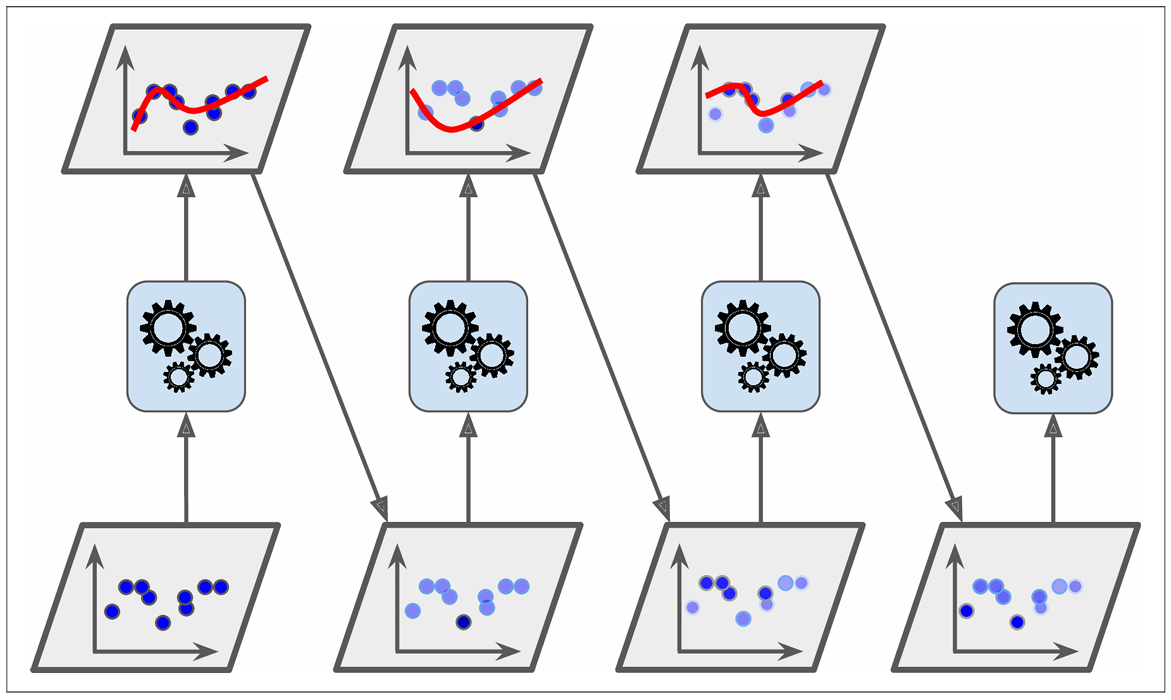

In [5]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier

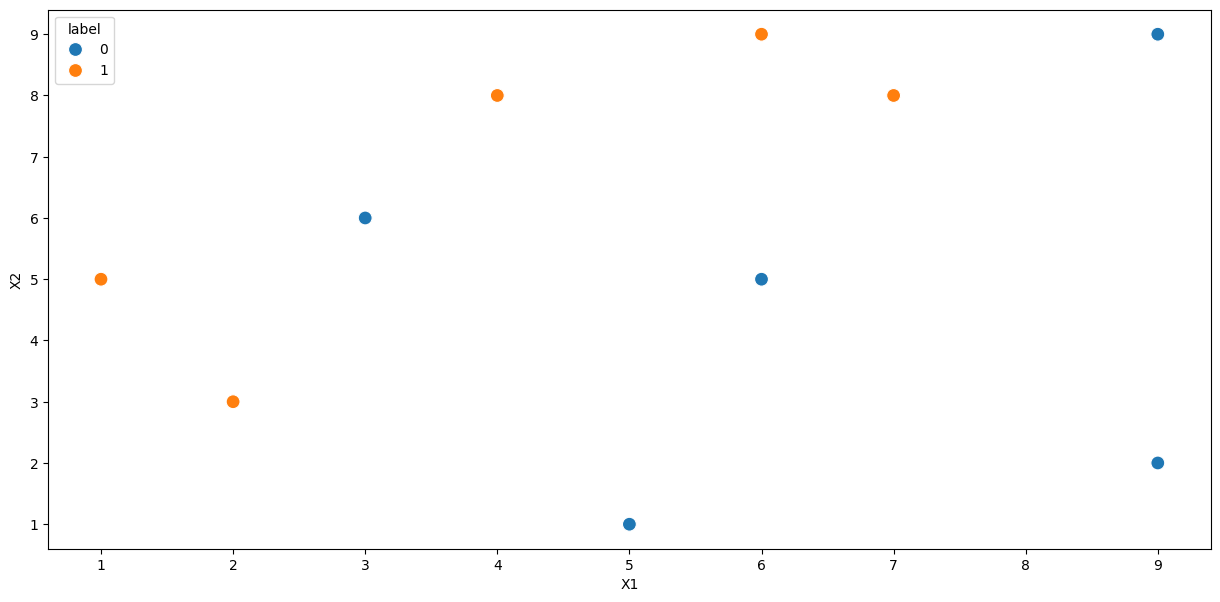

In [15]:
df = pd.DataFrame()
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

plt.figure(figsize = (15, 7))
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'], s=100)
plt.show()

<hr>

> ### ADABOOST FROM SCRATCH
> For example, to build an AdaBoost classifier, a first base classifier (such as a Decision Tree) is trained and used to make predictions on the training set. The relative weight of misclassified training instances is then increased. A second classifier is trained using the updated weights and again it makes predictions on the training set, weights are updated, and so on.


> ### STEP 1 - ASSINING WEIGHTS TO ALL THE INSTANCES = `1 / no. instances`

In [16]:
df['weights'] = 1/df.shape[0]
df.head()

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1


> ### STEP 2 - APPLYING 1ST DECISION STUMP ON THE DATA
> `DECISION STUMP` - A Decision Stump is a Decision Tree with `max_depth=1`, in other words, a tree composed of a single decision node plus two leaf nodes. This is the `default base estimator for the AdaBoostClassifier class`

In [17]:
dt1 = DecisionTreeClassifier(max_depth=1)
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

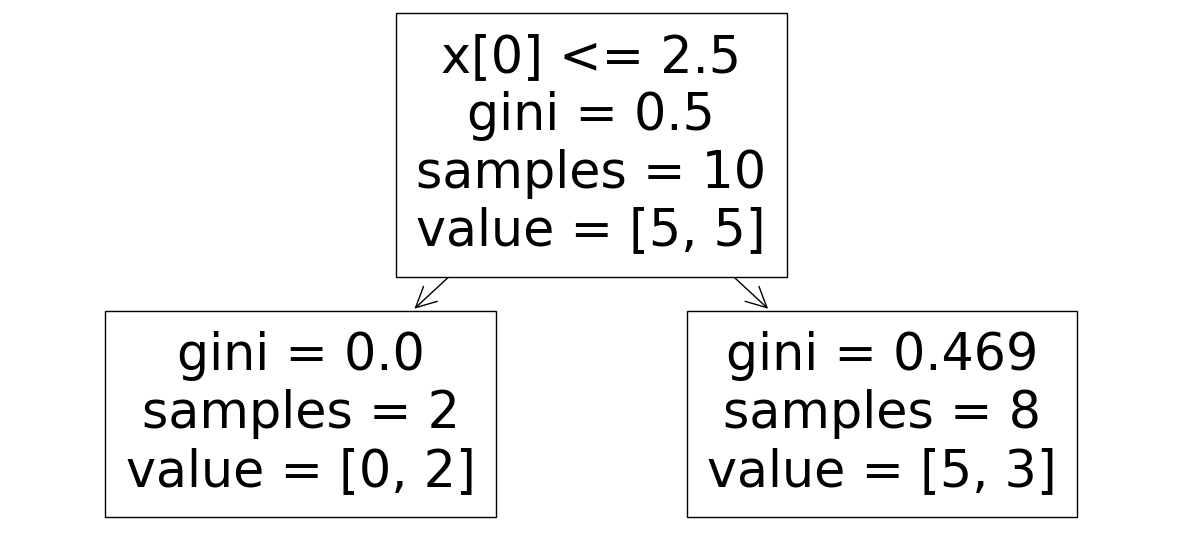

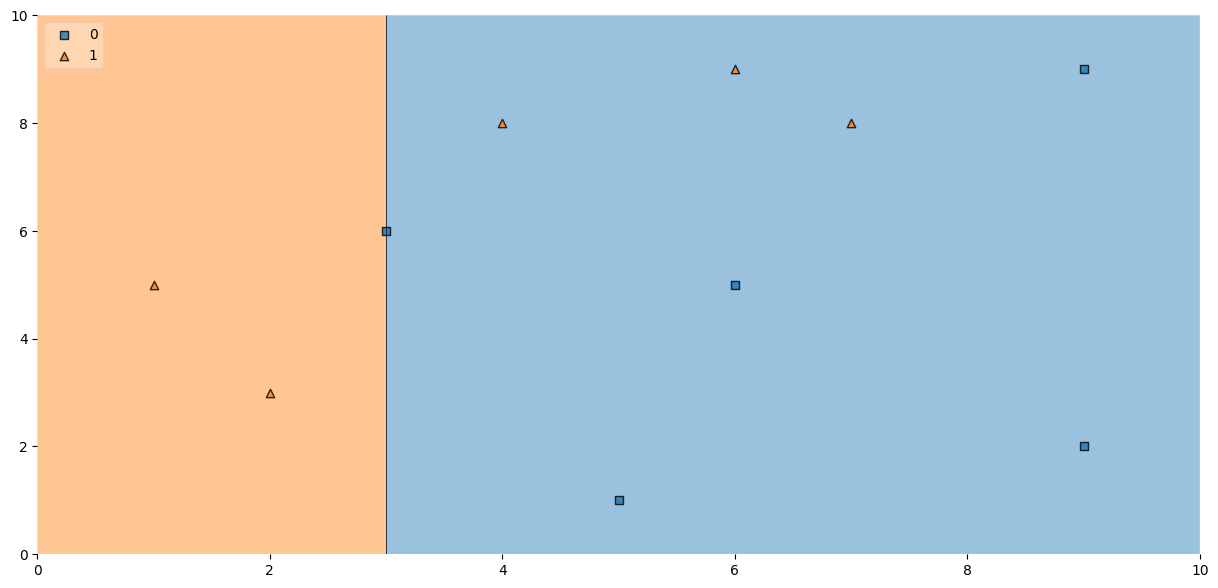

In [19]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 7))
plot_tree(dt1)
plt.show()

plt.figure(figsize=(15, 7))
plot_decision_regions(X, y, clf=dt1, legend=2)
plt.show()

In [20]:
df['y_pred'] = dt1.predict(X)
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


> ### STEP 3 - CALCULATING ERROR MADE BY 1ST DECISION STUMP AND FINDING MODEL WEIGHT
> The more accurate the predictor is, the higher its weight will be. If it is just guessing randomly, then its weight will be close to zero. However, if it is most often wrong (i.e., less accurate than random guessing), then its weight will be negative.<br><br>
> 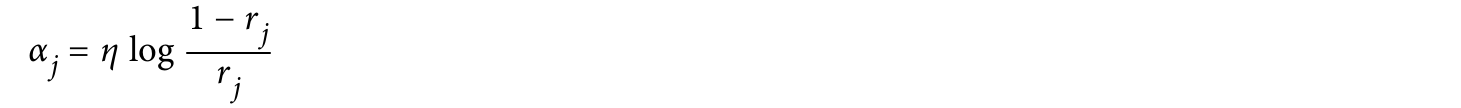

In [21]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

alpha1 = calculate_model_weight(0.3)
print(alpha1)

0.42364893019360184


> ### STEP 4 - UPDATING WEIGHTS OF ALL THE INSTANCES AND NORMALIZE THEM
> Next the instance weights are updated: the misclassified instancesare boosted.<br><br>
> 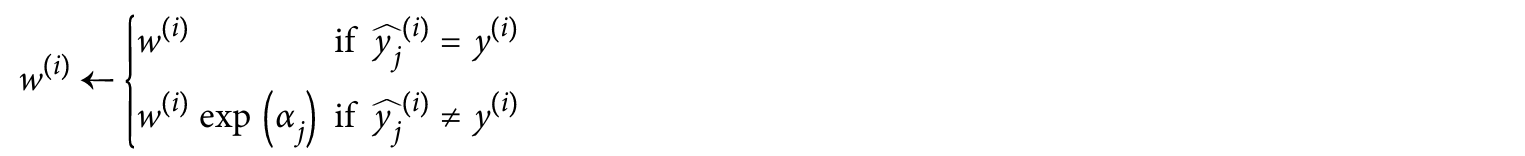

In [ ]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [23]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


> ### STEP 5 - CREATING A NEW TRAINING DATA FOR NEXT DECISION STUMP

In [25]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [26]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

index_values = create_new_dataset(df)
index_values

[3, 1, 5, 2, 7, 4, 2, 5, 5, 3]

In [27]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
3,4,8,1,0.1
1,2,3,1,0.1
5,6,9,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
4,5,1,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1
3,4,8,1,0.1


> ### STEP 6 - APPLY THE SAME PROCESS AGAIN

In [28]:
dt2 = DecisionTreeClassifier(max_depth=1)
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

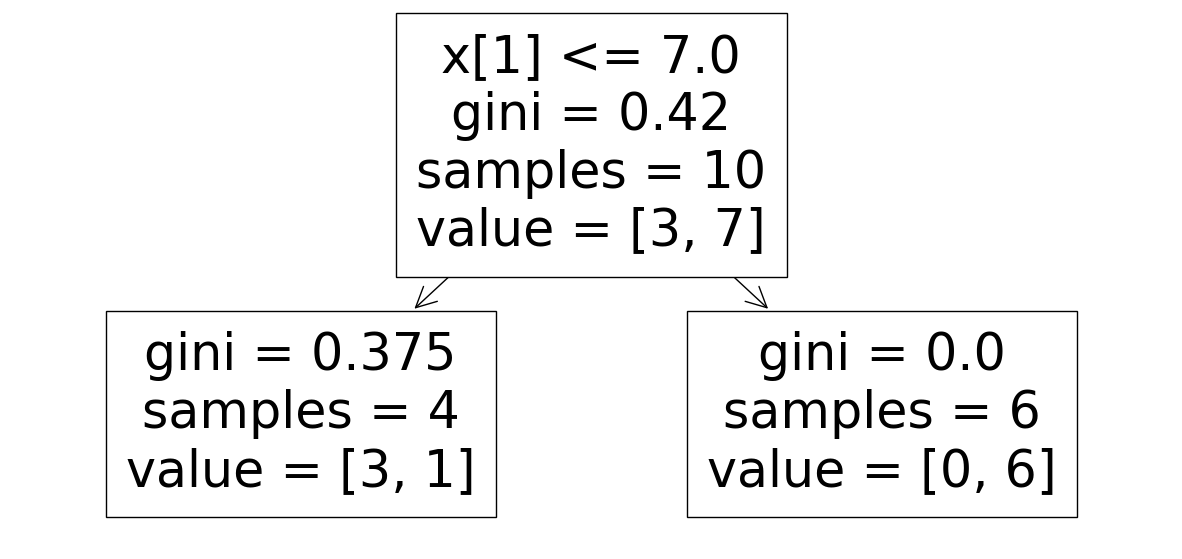

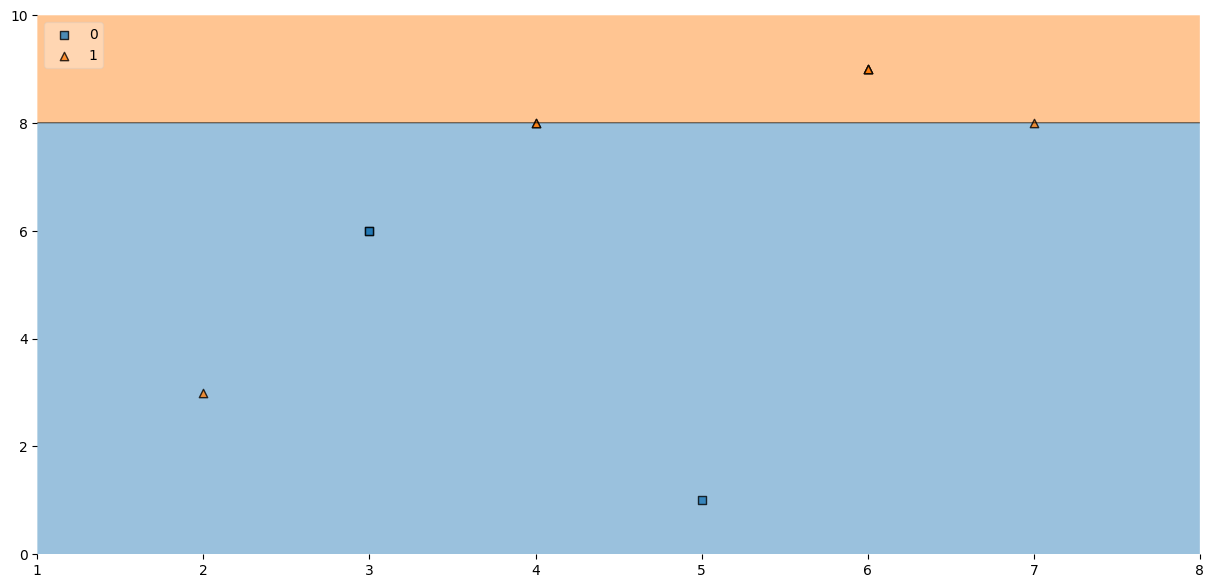

In [29]:
plt.figure(figsize=(15, 7))
plot_tree(dt2)
plt.show()

plt.figure(figsize=(15, 7))
plot_decision_regions(X, y, clf=dt2, legend=2)
plt.show()

In [30]:
second_df['y_pred'] = dt2.predict(X)
alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [32]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [33]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [34]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
3,4,8,1,0.1,1,0.033622,0.056034,0.056034,0.000000
1,2,3,1,0.1,0,0.297427,0.495694,0.551728,0.056034
5,6,9,1,0.1,1,0.033622,0.056034,0.607762,0.551728
2,3,6,0,0.1,0,0.033622,0.056034,0.663796,0.607762
7,7,8,1,0.1,1,0.033622,0.056034,0.719830,0.663796
4,5,1,0,0.1,0,0.033622,0.056034,0.775864,0.719830
2,3,6,0,0.1,0,0.033622,0.056034,0.831898,0.775864
5,6,9,1,0.1,1,0.033622,0.056034,0.887932,0.831898
5,6,9,1,0.1,1,0.033622,0.056034,0.943966,0.887932
3,4,8,1,0.1,1,0.033622,0.056034,1.000000,0.943966


In [35]:
index_values = create_new_dataset(second_df)
third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df

,X1,X2,label,weights
4,5,1,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
1,2,3,1,0.1
1,2,3,1,0.1
5,6,9,1,0.1
5,6,9,1,0.1
7,7,8,1,0.1
4,5,1,0,0.1
1,2,3,1,0.1


> ### THIRD DECISION STUMP

In [36]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [37]:
third_df['y_pred'] = dt3.predict(X)
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [38]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


<HR>

> ### MODEL PREDICTION
>  To make predictions, AdaBoost simply computes the predictions of all the predictors and weighs them using the predictor weights αj. The predicted class is the one that receives the majority of weighted votes.<BR><BR>
> 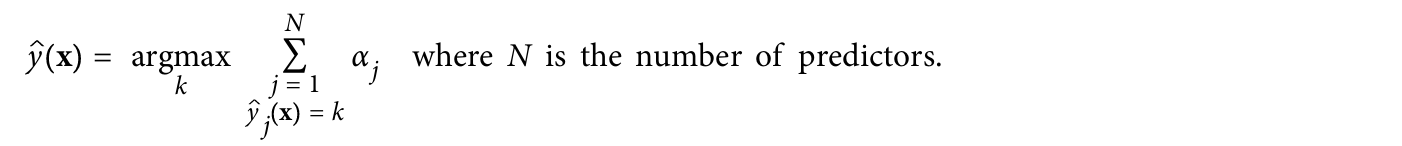

In [49]:
query = np.array([1,5]).reshape(1,2)
print(dt1.predict(query), dt2.predict(query), dt3.predict(query))

[1] [0] [0]


In [50]:
alpha1*(1) + alpha2*(0) + alpha3*(0)

0.42364893019360184

In [51]:
np.sign(1.09)

1.0

In [47]:
query = np.array([9,9]).reshape(1,2)
print(dt1.predict(query), dt2.predict(query), dt3.predict(query))

[0] [1] [1]


In [52]:
alpha1*(0) + alpha2*(1) + alpha3*(1)

0.6749633584745081

In [53]:
np.sign(0.67)

1.0